In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3)

20

In [4]:
x5 = np.arange(-5,5,0.25)
x5

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
y5 = f(x5)

In [6]:
y5

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

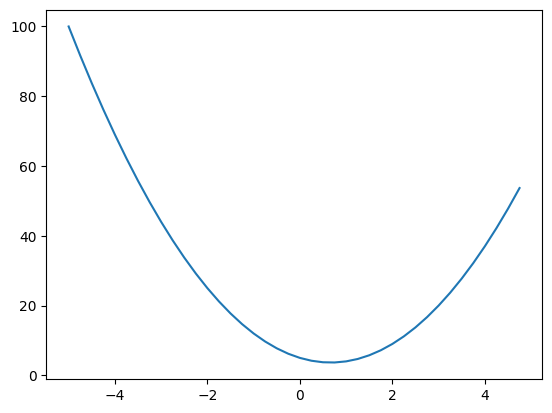

In [7]:
plt.plot(x5,y5)
plt.show()

In [8]:
h = 0.001
x = 3
print(f(x))
print(f(x+h))

20
20.014003000000002


In [9]:
f(x+h) - f(x)

0.01400300000000243

In [10]:
(f(x+h) - f(x)) / h

14.00300000000243

In [11]:
## so at 3 this is slope

In [12]:
h = 0.001
x = -3
(f(x+h) - f(x))/h

-21.996999999998934

In [13]:
h = 0.001
x = 2/3
(f(x+h) - f(x))/h

0.0029999999995311555

In [14]:
## lets get more complex

In [15]:
class Values:
    def __init__(self,data):
        self.data = data

    def __repr__(self):
        return f"Values(data={self.data})"
    
    def __add__(self,other):
        out = Values(self.data + other.data)
        return out
    
    def __mul__(self, other):
        out = Values(self.data * other.data)
        return out 

a = Values(2.0)
b = Values(-3.0)
c = Values(10.0)
a+b

Values(data=-1.0)

In [16]:
Values

__main__.Values

In [17]:
a

Values(data=2.0)

In [18]:
a * b

Values(data=-6.0)

In [19]:
a*b + c
##(a.__mul__(b)).__add__(c)

Values(data=4.0)

In [20]:
a.__mul__(b).__add__(c)

Values(data=4.0)

In [21]:
class Values:
    def __init__(self,data, _children=(), _op = "", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Values(data={self.data})"
    
    def __add__(self,other):
        out = Values(self.data + other.data, (self,other), "+")
        return out
    
    def __mul__(self, other):
        out = Values(self.data * other.data, (self,other), "*")
        return out 

a = Values(2.0, label="a")
b = Values(-3.0, label="b")
c = Values(10.0, label="c")
# print(a+b)
e = a * b
e.label = "e"
d = e + c
d.label = "d"
d

f = Values(-2.0, label="f")
l = d*f
l.label = "L"
l

Values(data=-8.0)

In [22]:
d

Values(data=4.0)

In [23]:
d._prev

{Values(data=-6.0), Values(data=10.0)}

In [24]:
d._op

'+'

In [25]:
a*b, c

(Values(data=-6.0), Values(data=10.0))

In [26]:
from graphviz import Digraph

In [27]:
def trace(root):
    ### build a set of all the nodes and edge in the graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

In [28]:
def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir":"LR"}) ## LR : left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        ## for any value in the graph, create a rectangular ("record") node for it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f}" % (n.label,n.data,n.grad), shape="record")

        if n._op:
            ## if this value is a result of some operation, create an op node for it 
            dot.node(name=uid+n._op, label=n._op)
            ## and connect this node to it
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        ## connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [40]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

In [41]:
class Values:
    def __init__(self,data, _children=(), _op = "", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Values(data={self.data})"
    
    def __add__(self,other):
        out = Values(self.data + other.data, (self,other), "+")
        return out
    
    def __mul__(self, other):
        out = Values(self.data * other.data, (self,other), "*")
        return out 

a = Values(2.0, label="a")
b = Values(-3.0, label="b")
c = Values(10.0, label="c")
# print(a+b)
e = a * b
e.label = "e"
d = e + c
d.label = "d"
d

f = Values(-2.0, label="f")
l = d*f
l.label = "L"
l

Values(data=-8.0)

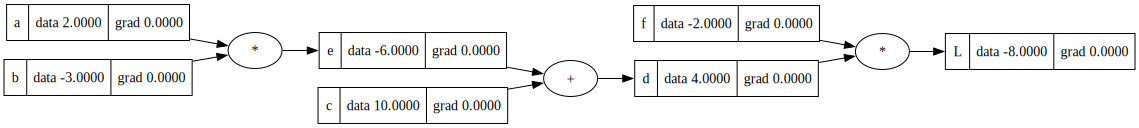

In [42]:
draw_dot(l)

dl/dl = 1 

l = d * f 

dl / dd = f
dl / df = d

d = e + c

dd / de = 1
dd / dc = 1

dl/de = dl/dd * dd/de = f * 1 = f
dl/dc = dl/dd * dd/dc = f * 1 = f

e = a * b

de / da = b 
de / db = a

dl / da = dl / de * de / da = f * b
dl / db = dl / de * de / db = f * a

## lets first set the gradient manually

In [43]:
l.grad = 1.0
d.grad = -2.0
f.grad = 4.0

e.grad = -2.0
c.grad = -2.0

a.grad = -2.0 * -3.0
b.grad = -2.0 * 2

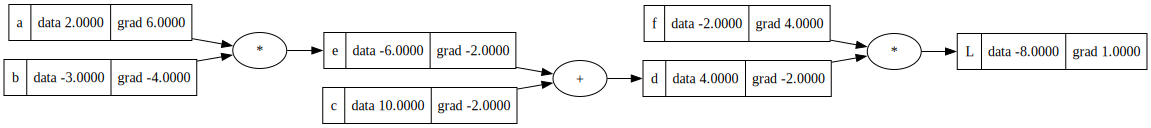

In [44]:
draw_dot(l)

## Verify it by running below code.

In [45]:
def lol():
    h = 0.001 

    a = Values(2.0, label="a")
    b = Values(-3.0, label="b")
    c = Values(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Values(-2.0, label="f")
    l = d*f
    l.label = "L"
    l1 = l 
    l1 = l1.data


    a = Values(2.0, label="a")
    # a.data += h
    b = Values(-3.0, label="b")
    # b.data += h
    c = Values(10.0, label="c")
    ## do change in c
    # c.data += h
    e = a * b
    e.label = "e"
    ## do change in e 
    # e.data += h
    d = e + c
    d.label = "d"
    ## change in d 
    # d.data += h
    f = Values(-2.0, label="f")
    ## change in f 
    # f.data += h
    l = d*f
    l.label = "L"
    ## lets change in l directly 
    l2 = l
    l2 = l2.data
    # l2 = l2 + h

    print(((l2-l1)/h))

lol()

0.0


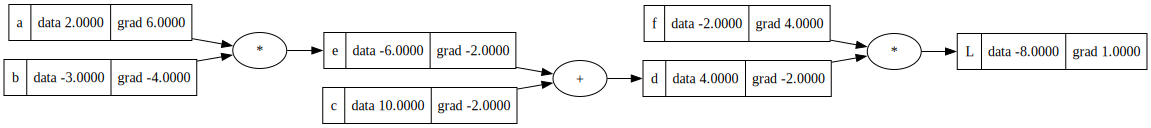

In [46]:
draw_dot(l)

In [47]:
l.data

-8.0

In [48]:
## now just do forward pass 
### first step in optimization

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
l = d * f 

print(l.data)

-7.286496


In [49]:
## now just do forward pass 
### first step in optimization

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
l = d * f 

print(l.data)

-6.586368000000001


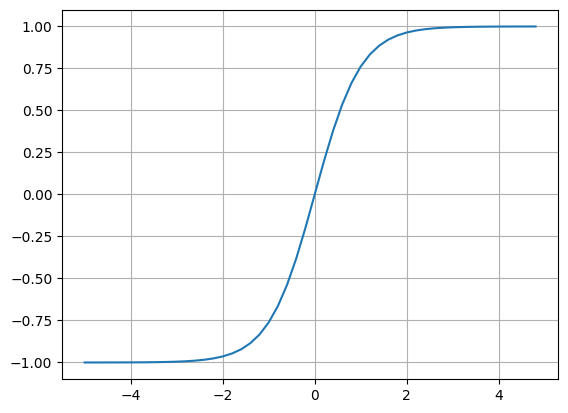

In [50]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()

In [51]:
class Values:
    def __init__(self,data, _children=(), _op = "", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Values(data={self.data})"
    
    def __add__(self,other):
        out = Values(self.data + other.data, (self,other), "+")
        return out
    
    def __mul__(self, other):
        out = Values(self.data * other.data, (self,other), "*")
        return out 

    def tanh(self):
        x = self.data
        t = (math.exp(x*2)-1)/(math.exp(2*x)+1)
        out = Values(t, (self,), "tanh")
        return out 

        
a = Values(2.0, label="a")
b = Values(-3.0, label="b")
c = Values(10.0, label="c")
# print(a+b)
e = a * b
e.label = "e"
d = e + c
d.label = "d"
d

f = Values(-2.0, label="f")
l = d*f
l.label = "L"
l

Values(data=-8.0)

In [52]:
## values of x1 and x2
x1 = Values(2.0, label="x1")
x2 = Values(0.0, label="x2")
## weights of x1 and x2 
w1 = Values(-3.0, label="w1")
w2 = Values(1.0, label="w2")
## bias of the neuron
b = Values(6.7, label="b")

x1w1 = x1*w1 
x1w1.label = "x1w1"

x2w2 = x2*w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"

n = x1w1x2w2 + b
n.label = "n"

o = n.tanh()

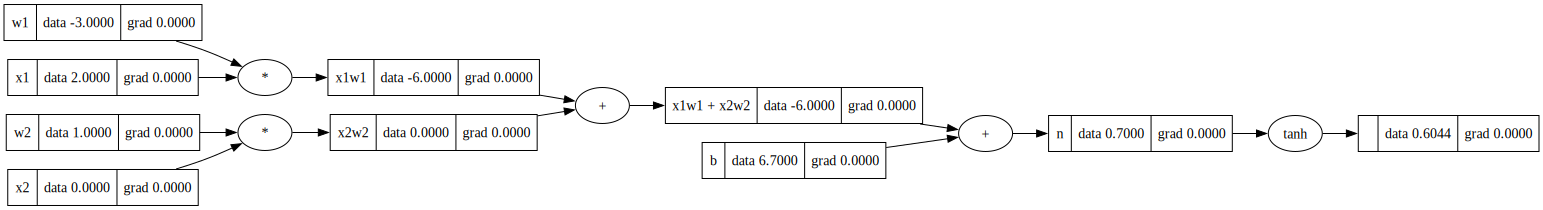

In [53]:
draw_dot(o)

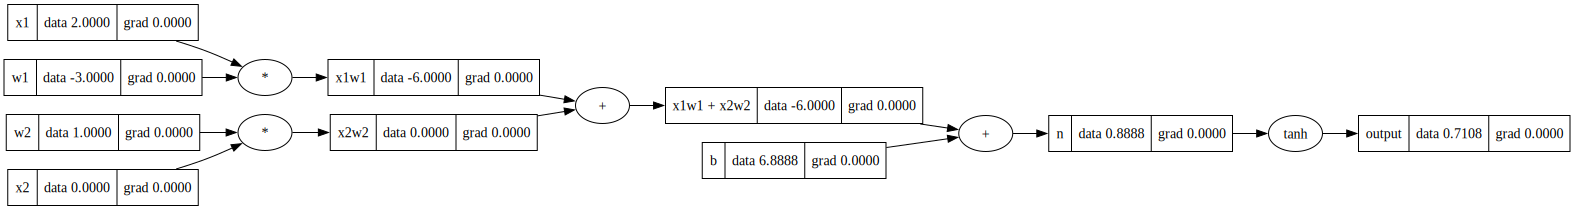

In [54]:
## values of x1 and x2
x1 = Values(2.0, label="x1")
x2 = Values(0.0, label="x2")
## weights of x1 and x2 
w1 = Values(-3.0, label="w1")
w2 = Values(1.0, label="w2")
## bias of the neuron
b = Values(6.888812344323334, label="b")

x1w1 = x1*w1 
x1w1.label = "x1w1"

x2w2 = x2*w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"

n = x1w1x2w2 + b
n.label = "n"

o = n.tanh()
o.label = "output"

draw_dot(o)


In [55]:
1 - o.data**2 

0.49475393417407476

### derevatives 
### back propogation

d0/dn = 1 - tanh(n)**2   ==>  1 - o**2
d0/dn = 0.49475393417407476





In [56]:
o.grad = 1.0
n.grad = 0.5

x1w1x2w2.grad = 0.5
b.grad = 0.5

x1w1.grad = 0.5
x2w2.grad = 0.5

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad


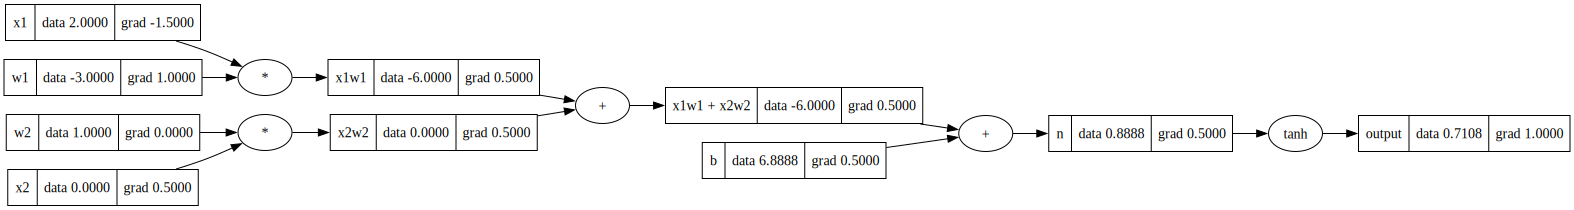

In [57]:
draw_dot(o)

# Now how we can do this by automatically.

In [58]:
class Values:
    def __init__(self,data, _children=(), _op = "", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._backward = lambda : None # default no backward
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Values(data={self.data})"
    
    def __add__(self,other):
        out = Values(self.data + other.data, (self,other), "+")
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        out = Values(self.data * other.data, (self,other), "*")
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out 

    def tanh(self):
        x = self.data
        t = (math.exp(x*2)-1)/(math.exp(2*x)+1)
        out = Values(t, (self,), "tanh")
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward

        return out 

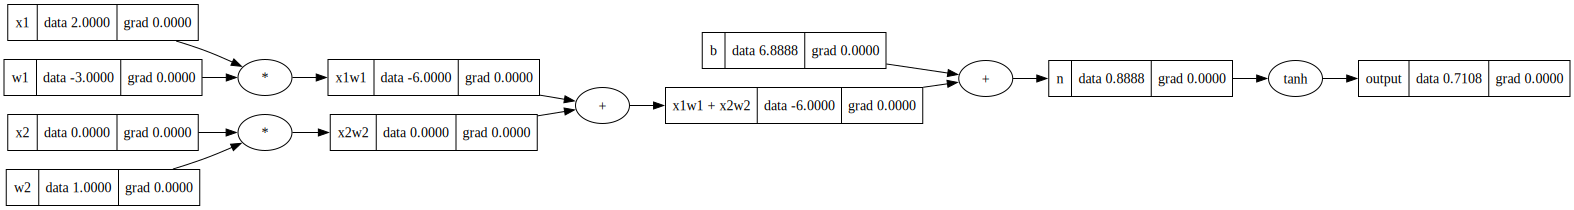

In [59]:
## values of x1 and x2
x1 = Values(2.0, label="x1")
x2 = Values(0.0, label="x2")
## weights of x1 and x2 
w1 = Values(-3.0, label="w1")
w2 = Values(1.0, label="w2")
## bias of the neuron
b = Values(6.888812344323334, label="b")

x1w1 = x1*w1 
x1w1.label = "x1w1"

x2w2 = x2*w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"

n = x1w1x2w2 + b
n.label = "n"

o = n.tanh()
o.label = "output"

draw_dot(o)


In [60]:
o.grad = 1.0

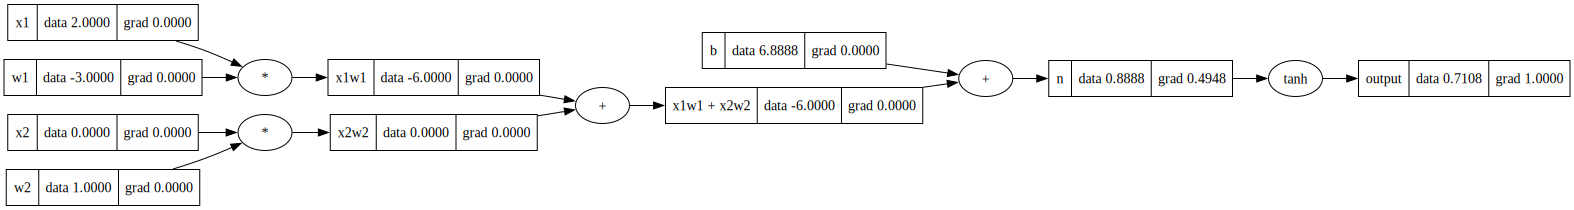

In [61]:
o._backward()
draw_dot(o)

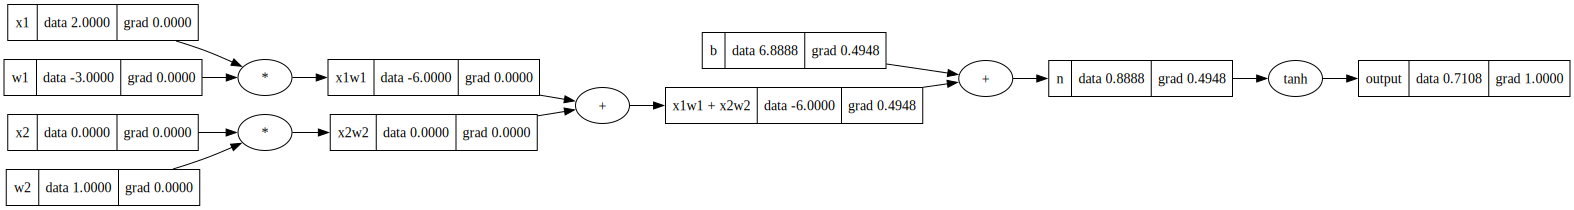

In [62]:
n._backward()
draw_dot(o)

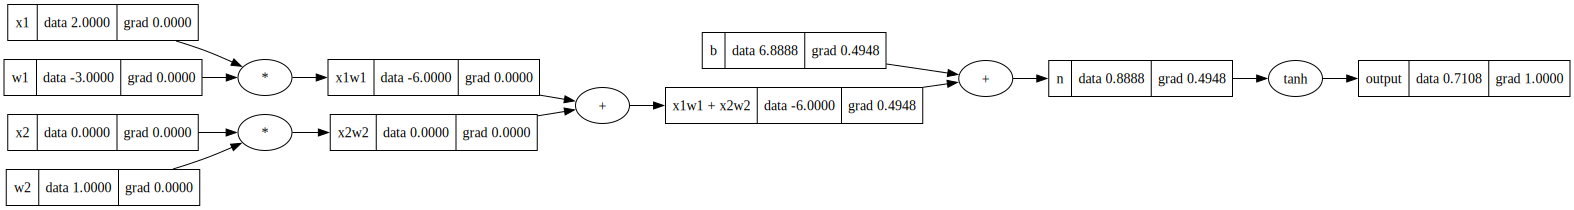

In [63]:
b._backward()
draw_dot(o)

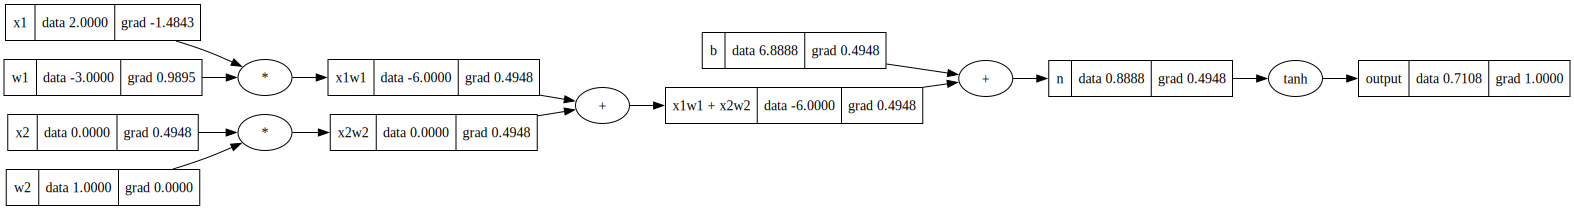

In [64]:
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()
draw_dot(o)

In [65]:
## so now lets calculate this all grad automatically, for that lets implement topological sorting.

o.grad = 1
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)
topo

[Values(data=2.0),
 Values(data=-3.0),
 Values(data=-6.0),
 Values(data=0.0),
 Values(data=1.0),
 Values(data=0.0),
 Values(data=-6.0),
 Values(data=6.888812344323334),
 Values(data=0.888812344323334),
 Values(data=0.7108066304037444)]

In [66]:
## lets see it is working or not

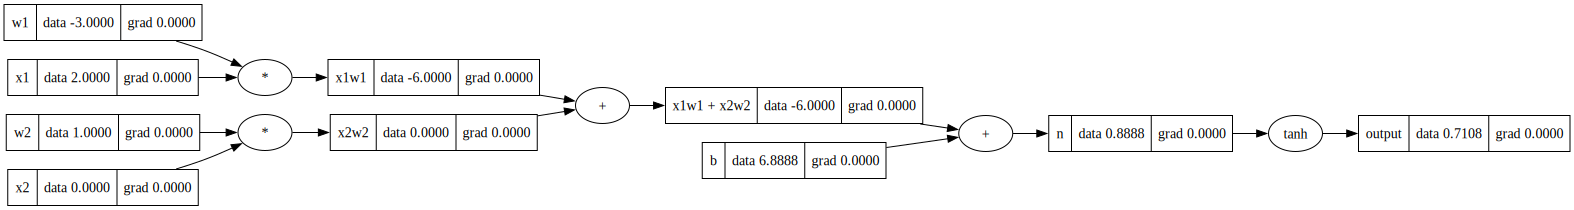

In [67]:
## values of x1 and x2
x1 = Values(2.0, label="x1")
x2 = Values(0.0, label="x2")
## weights of x1 and x2 
w1 = Values(-3.0, label="w1")
w2 = Values(1.0, label="w2")
## bias of the neuron
b = Values(6.888812344323334, label="b")

x1w1 = x1*w1 
x1w1.label = "x1w1"

x2w2 = x2*w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"

n = x1w1x2w2 + b
n.label = "n"

o = n.tanh()
o.label = "output"

draw_dot(o)


In [68]:
## so now lets calculate this all grad automatically, for that lets implement topological sorting.

o.grad = 1
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)

for node in reversed(topo):
    node._backward()

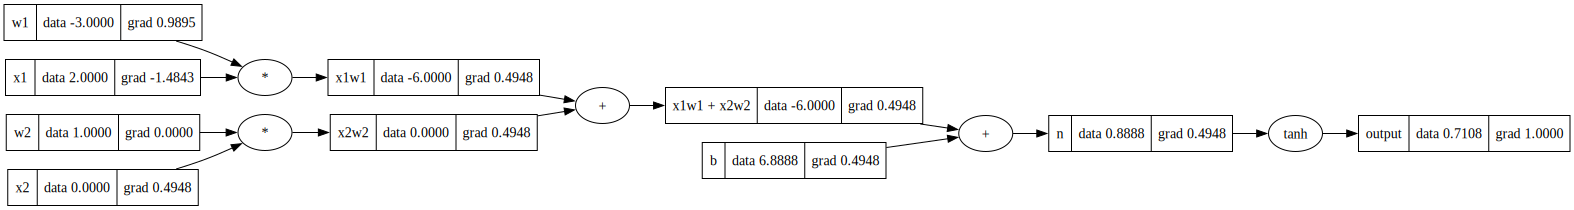

In [69]:
draw_dot(o)

In [70]:
## lets hide this thing(put it in the class)

In [71]:
class Values:
    def __init__(self,data, _children=(), _op = "", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._backward = lambda : None # default no backward
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Values(data={self.data})"
    
    def __add__(self,other):
        out = Values(self.data + other.data, (self,other), "+")
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        out = Values(self.data * other.data, (self,other), "*")
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out 

    def tanh(self):
        x = self.data
        t = (math.exp(x*2)-1)/(math.exp(2*x)+1)
        out = Values(t, (self,), "tanh")
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward

        return out 

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

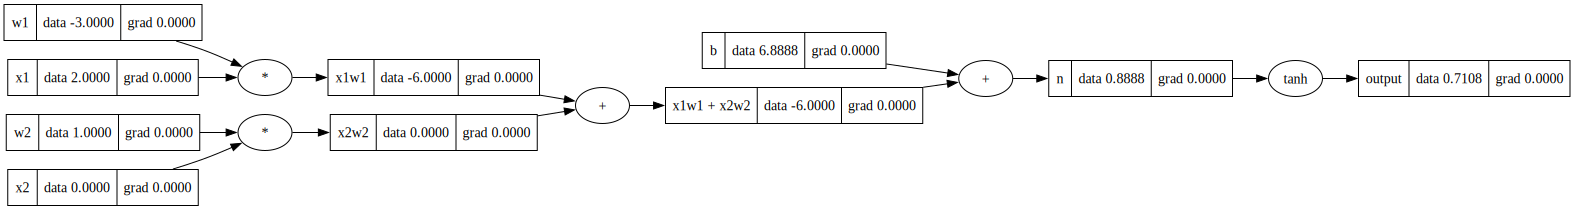

In [72]:
## values of x1 and x2
x1 = Values(2.0, label="x1")
x2 = Values(0.0, label="x2")
## weights of x1 and x2 
w1 = Values(-3.0, label="w1")
w2 = Values(1.0, label="w2")
## bias of the neuron
b = Values(6.888812344323334, label="b")

x1w1 = x1*w1 
x1w1.label = "x1w1"

x2w2 = x2*w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"

n = x1w1x2w2 + b
n.label = "n"

o = n.tanh()
o.label = "output"

draw_dot(o)


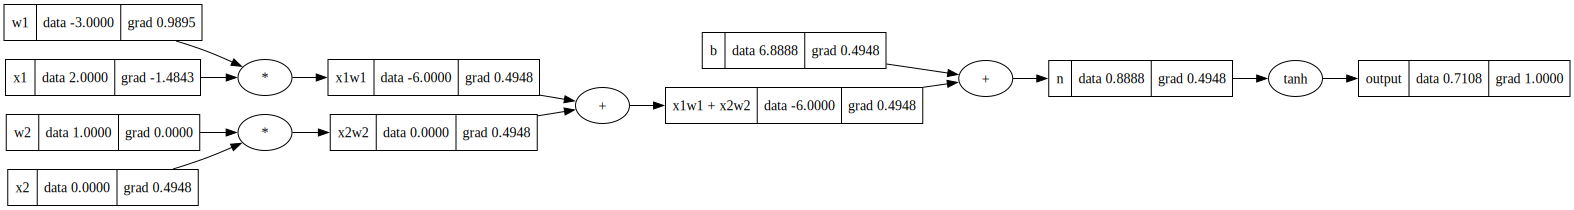

In [73]:
## now lets just called them and see what happend 
o.backward()

draw_dot(o)

In [74]:
### see all the graident are calculated easily

## Bugs in the code.

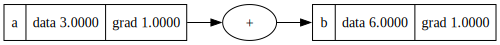

In [75]:
a = Values(3.0, label="a")
b = a + a 
b.label = "b"
b.backward()
draw_dot(b)

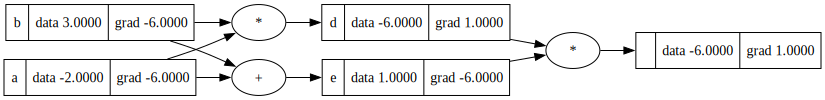

In [76]:
a = Values(-2.0, label="a")
b = Values(3.0, label="b")
d = a * b
d.label = "d"
e = a + b 
e.label = "e"
f = d*e
f.lable = "f"

f.backward()
draw_dot(f)

## this grad are worng the reason is when we are using same varible then asper the rule we have to add the grad but here we are over writting it.

## so we have to made change in the code.

In [77]:
class Values:
    def __init__(self,data, _children=(), _op = "", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._backward = lambda : None # default no backward
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Values(data={self.data})"
    
    def __add__(self,other):
        out = Values(self.data + other.data, (self,other), "+")
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        out = Values(self.data * other.data, (self,other), "*")
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out 

    def tanh(self):
        x = self.data
        t = (math.exp(x*2)-1)/(math.exp(2*x)+1)
        out = Values(t, (self,), "tanh")
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out 

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

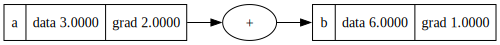

In [78]:
a = Values(3.0, label="a")
b = a + a 
b.label = "b"
b.backward()
draw_dot(b)

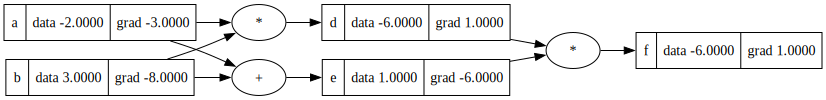

In [79]:
a = Values(-2.0, label="a")
b = Values(3.0, label="b")
d = a * b
d.label = "d"
e = a + b 
e.label = "e"
f = d*e
f.label = "f"

f.backward()
draw_dot(f)

In [80]:
### lets just make things more complex and create something more amazing.

In [81]:
class Values:
    def __init__(self,data, _children=(), _op = "", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._backward = lambda : None # default no backward
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Values(data={self.data})"
    
    def __add__(self,other):
        out = Values(self.data + other.data, (self,other), "+")
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        out = Values(self.data * other.data, (self,other), "*")
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out 

    def tanh(self):
        x = self.data
        t = (math.exp(x*2)-1)/(math.exp(2*x)+1)
        out = Values(t, (self,), "tanh")
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out 

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [83]:
class Values:
    def __init__(self,data, _children=(), _op = "", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._backward = lambda : None # default no backward
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Values(data={self.data})"
    
    def __add__(self,other):
        other = other if isinstance(other, Values) else Values(other)  
        out = Values(self.data + other.data, (self,other), "+")
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Values) else Values(other)  
        out = Values(self.data * other.data, (self,other), "*")
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out 

    def tanh(self):
        x = self.data
        t = (math.exp(x*2)-1)/(math.exp(2*x)+1)
        out = Values(t, (self,), "tanh")
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out 

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [84]:
a = Values(3) 
a + 1

Values(data=4)

In [85]:
### new problem ???
a = Values(2)

a * 3


Values(data=6)

In [87]:
# 3 * a

## this is because 
 # a * 3  ===>   a.__mul__(3)
 # 3 * a ===> 3.__mul__(a) --- >this is going to give you the error this is where __rmul__ comes in the picture.

In [88]:
class Values:
    def __init__(self,data, _children=(), _op = "", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._backward = lambda : None # default no backward
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Values(data={self.data})"
    
    def __add__(self,other):
        other = other if isinstance(other, Values) else Values(other)  
        out = Values(self.data + other.data, (self,other), "+")
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Values) else Values(other)  
        out = Values(self.data * other.data, (self,other), "*")
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out 

    def __rmul__(self,other):
        return self * other

    def exp(self):
        x = self.data
        out = Values(math.exp(x), (self,), "exp")

        def _backward():
            self.grad = out.data + out.grad
        
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(x*2)-1)/(math.exp(2*x)+1)
        out = Values(t, (self,), "tanh")
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out 

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [89]:
b  = Values(4)
3 * b

Values(data=12)

In [90]:
## see this is working fine. because now we are using __rmul__

In [137]:
class Values:
    def __init__(self,data, _children=(), _op = "", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._backward = lambda : None # default no backward
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Values(data={self.data})"
    
    def __add__(self,other):
        print(self.dtype, other.dtype)
        other = other if isinstance(other, Values) else Values(other)  

        out = Values(self.data + other.data, (self,other), "+")
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        
        out._backward = _backward
        
        return out
    
    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (- other)
    
    def __mul__(self, other):
        other = other if isinstance(other, Values) else Values(other)  
        out = Values(self.data * other.data, (self,other), "*")
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out 

    def __pow__(self,other):
        assert isinstance(other, (int,float))
        out = Values(self.data**other,(self,), f"**{other}")
        
        def _backward():
            self.grad += other * (self.data**(other-1)) * out.grad
 
        out._backward = _backward
        return out
        
    def __rmul__(self,other):
        return self * other

    def __truediv__(self, other):
        return self * ( other**-1)

    def exp(self):
        x = self.data
        out = Values(math.exp(x), (self,), "exp")

        def _backward():
            self.grad = out.data * out.grad
        
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(x*2)-1)/(math.exp(2*x)+1)
        out = Values(t, (self,), "tanh")
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out 


    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [92]:
a = Values(4.0)
b = Values(2.0)

a / b

Values(data=2.0)

In [93]:
a - b

Values(data=2.0)

In [94]:
## this is not done 
## to implement this we can do opration like 

### a * (1/b)
### a * (b**-1)
### i prefered operation like : a * (b**-1)  because it is more clear and easy to understand  b**k k is constant 


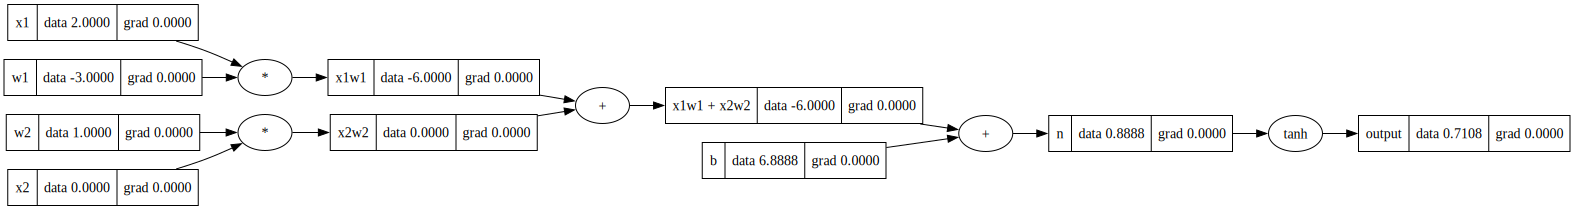

In [95]:
## values of x1 and x2
x1 = Values(2.0, label="x1")
x2 = Values(0.0, label="x2")
## weights of x1 and x2 
w1 = Values(-3.0, label="w1")
w2 = Values(1.0, label="w2")
## bias of the neuron
b = Values(6.888812344323334, label="b")

x1w1 = x1*w1 
x1w1.label = "x1w1"

x2w2 = x2*w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"

n = x1w1x2w2 + b
n.label = "n"

o = n.tanh()
o.label = "output"

draw_dot(o)


In [96]:
o.backward()

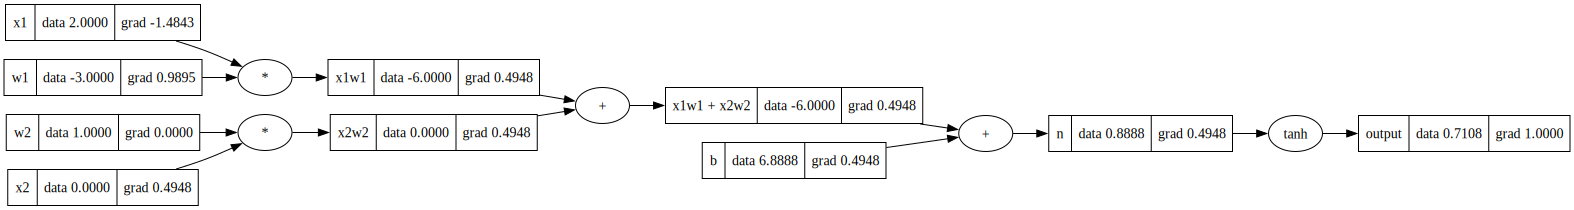

In [97]:
draw_dot(o)

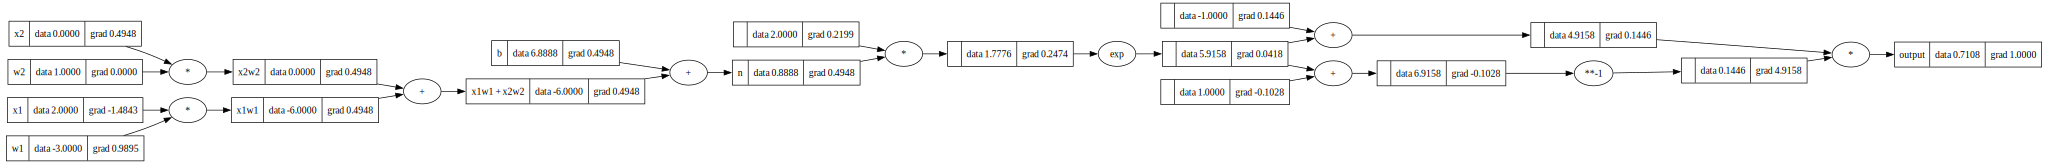

In [98]:
## values of x1 and x2
x1 = Values(2.0, label="x1")
x2 = Values(0.0, label="x2")
## weights of x1 and x2 
w1 = Values(-3.0, label="w1")
w2 = Values(1.0, label="w2")
## bias of the neuron
b = Values(6.888812344323334, label="b")

x1w1 = x1*w1 
x1w1.label = "x1w1"

x2w2 = x2*w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"

n = x1w1x2w2 + b
n.label = "n"

# ------- instead of directly using tanh lets break it into multiple steps
# o = n.tanh()

e = (2*n).exp()
o = (e - 1) / (e + 1)
# -------------

o.label = "output"
o.backward()
draw_dot(o)


## see by using torch

In [99]:
import torch

In [100]:
x1 = torch.Tensor([2.0])
x1, x1.type(), type(x1), x1.dtype

(tensor([2.]), 'torch.FloatTensor', torch.Tensor, torch.float32)

In [101]:
x1 = torch.Tensor([2.0]).double()
x1, x1.type(), type(x1), x1.dtype

(tensor([2.], dtype=torch.float64),
 'torch.DoubleTensor',
 torch.Tensor,
 torch.float64)

In [102]:
x1

tensor([2.], dtype=torch.float64)

In [103]:
x1.data

tensor([2.], dtype=torch.float64)

In [104]:
x1.data.item()

2.0

In [105]:
x1.item()

2.0

In [106]:
x1 = torch.Tensor([2.0]).double()
x1.requires_grad =  True
x2 = torch.Tensor([0.0]).double()
x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()
w2 = torch.Tensor([1.0]).double()
w1.requires_grad = True
w2.requires_grad = True
b = torch.Tensor([6.9327668374629]).double()
b.requires_grad = True

n = x1*w1 + x2*w2 + b 

o = torch.tanh(n)
print(o.data.item())
o.backward()

print("---------------")
print("X2", x2.grad.item())
print("X1", x1.grad.item())
print("W1", w1.grad.item())
print("W2", w2.grad.item())

0.7318813158695088
---------------
X2 0.46434973948111635
X1 -1.3930492184433492
W1 0.9286994789622327
W2 0.0


In [107]:
o

tensor([0.7319], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [108]:
o.item()

0.7318813158695088

In [109]:
x2.grad

tensor([0.4643], dtype=torch.float64)

In [110]:
w1.grad

tensor([0.9287], dtype=torch.float64)

In [111]:
import random

### single neurons

In [112]:
class Neuron:

    def __init__(self, nin):
        self.w = [Values(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Values(random.uniform(-1,1))

    def __call__(self, x):
        act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out 

x = [2.0, 3.0]
n = Neuron(2)

## this works bcause of __call__
n(x)

Values(data=-0.9883108712508246)

In [113]:
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for i in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]

        return outs[0] if len(outs) == 1 else outs

In [114]:
x = [2.0, 3.0]
n = Layer(2,3)
n(x)

[Values(data=0.4844544259457259),
 Values(data=-0.9931321875349158),
 Values(data=0.14073004790187127)]

In [115]:
class MLP:

    def __init__(self, nin, nout):
        sz = [nin] + nout

        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nout))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)

        return x

In [116]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 5, 2])
n(x)

[Values(data=0.8197387559656532), Values(data=0.6906732594195977)]

In [117]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 5, 1])
n(x)

Values(data=-0.43302691182610303)

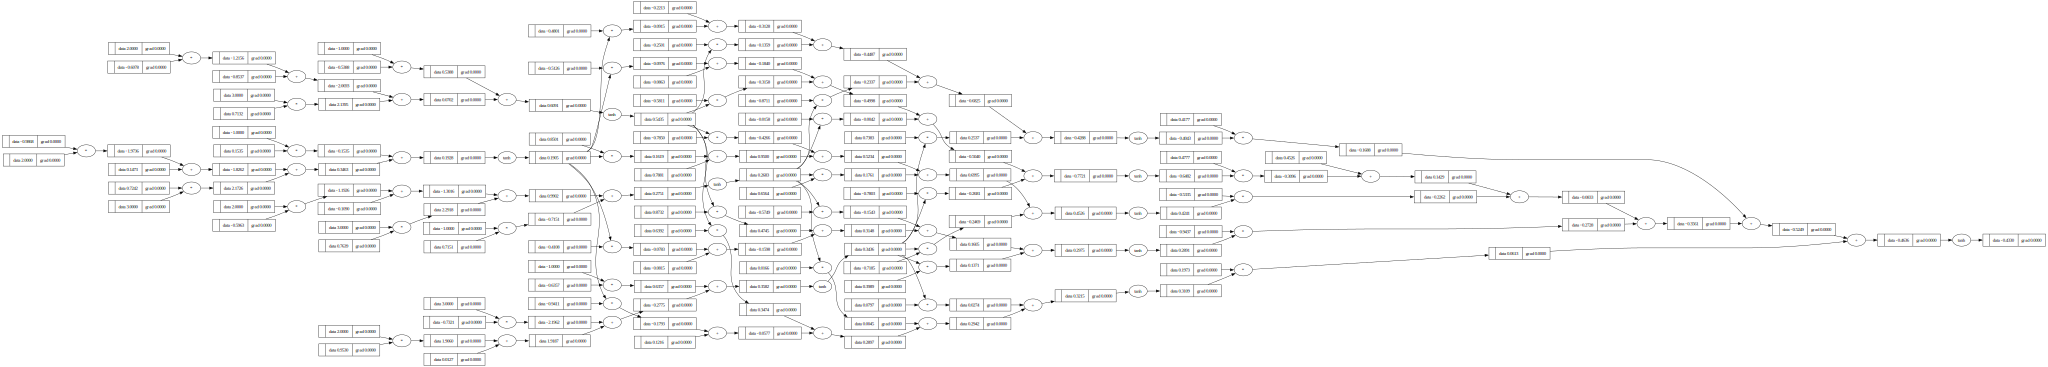

In [118]:
draw_dot(n(x))

In [119]:
import random

In [170]:
class Values:
    def __init__(self,data, _children=(), _op = "", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._backward = lambda : None # default no backward
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Values(data={self.data})"
    
    def __add__(self,other):
        # print(self, other)
        other = other if isinstance(other, Values) else Values(other)  

        out = Values(self.data + other.data, (self,other), "+")
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        
        out._backward = _backward
        
        return out
    
    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (- other)
    
    def __mul__(self, other):
        other = other if isinstance(other, Values) else Values(other)  
        out = Values(self.data * other.data, (self,other), "*")
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out 

    def __pow__(self,other):
        assert isinstance(other, (int,float))
        out = Values(self.data**other,(self,), f"**{other}")
        
        def _backward():
            self.grad += other * (self.data**(other-1)) * out.grad
 
        out._backward = _backward
        return out
        
    def __radd__(self, other):
        return self + other
        
    def __rmul__(self,other):
        return self * other

    def __truediv__(self, other):
        return self * ( other**-1)

    def exp(self):
        x = self.data
        out = Values(math.exp(x), (self,), "exp")

        def _backward():
            self.grad = out.data * out.grad
        
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(x*2)-1)/(math.exp(2*x)+1)
        out = Values(t, (self,), "tanh")
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out 


    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [171]:
class Neuron:
    def __init__(self, nin):
        self.w = [Values(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Values(random.uniform(-1,1))

    def __call__(self, x):
        ### w * x + b
        act = sum((wi*xi for wi,xi in zip(self.w,x)), self.b)
        out = act.tanh()
        return out

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs 

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)

        return x 

In [172]:
n = MLP(3,[4,4,1])

In [173]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] ### targte 
y_pred = [n(x) for x in xs]
y_pred

[Values(data=-0.8890784965459513),
 Values(data=-0.8974416067011223),
 Values(data=-0.9216216689167842),
 Values(data=-0.9131576724928873)]

In [174]:
(y_pred[0] - ys[0])**2

Values(data=3.568617566112312)

In [175]:
y_pred[0] - ys[0] + y_pred[1] - ys[1] + y_pred[2] - ys[2] + y_pred[3] - ys[3]

Values(data=-3.621299444656745)

In [176]:
sum((y_out - y_gt)**2 for y_gt, y_out in zip(ys, y_pred))

Values(data=7.245451232750151)

In [177]:
loss = sum((y_out - y_gt)**2 for y_gt, y_out in zip(ys, y_pred))
loss

Values(data=7.245451232750151)

In [178]:
loss.backward()

In [179]:
loss

Values(data=7.245451232750151)

In [188]:
n.layers[0].neurons[0].w[0], n.layers[0].neurons[0].w[0].grad

(Values(data=0.7075645204290786), -0.4460223020969192)

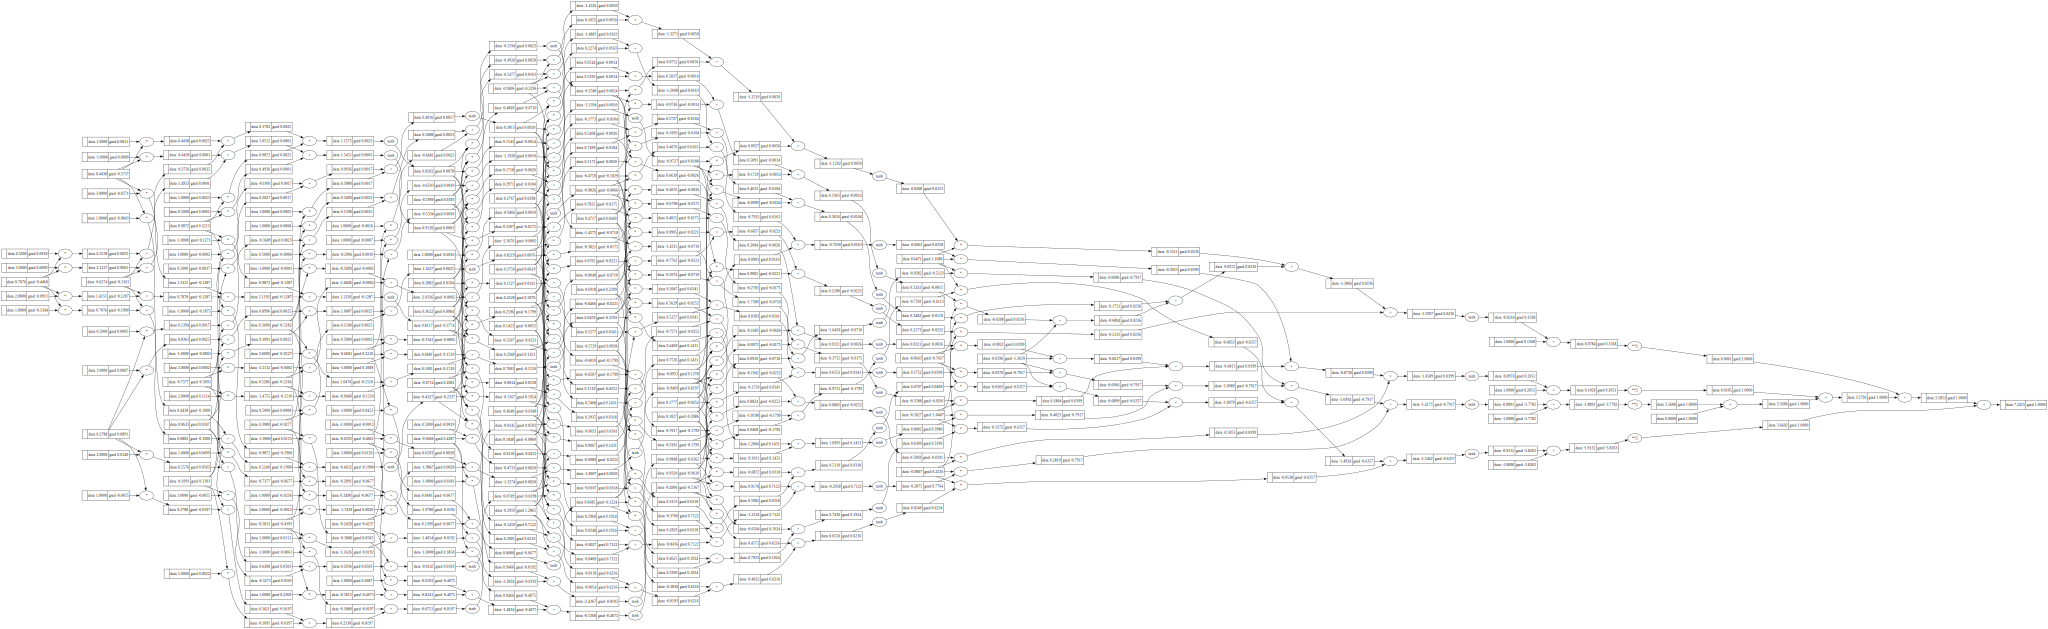

In [189]:
draw_dot(loss)

In [190]:
class Neuron:
    def __init__(self, nin):
        self.w = [Values(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Values(random.uniform(-1,1))

    def __call__(self, x):
        ### w * x + b
        act = sum((wi*xi for wi,xi in zip(self.w,x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w +[self.b]

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs 

    def parameters(self):
        params = [p  for neuron in self.neurons for p in neuron.parameters()]
        return params


class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)

        return x 

    def parameters(self):   
        return [p for layer in self.layers for p in layer.parameters()]

In [196]:
# n.parameters()

In [195]:
len(n.parameters())

41

In [192]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
n(x)

Values(data=-0.16937659591338844)

In [197]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] ### targte 
y_pred = [n(x) for x in xs]
y_pred

[Values(data=-0.16937659591338844),
 Values(data=0.8781322016454779),
 Values(data=0.7734182246313375),
 Values(data=0.0997136561353772)]

In [199]:
loss = sum((y_out - ygt)**2 for y_out, ygt in zip(y_pred, ys))
loss

Values(data=8.850349890331369)

In [200]:
loss.backward()

In [201]:
n.layers[0].neurons[0].w[0].grad

-0.0920190693325707

In [202]:
n.layers[0].neurons[0].w[0].data

-0.21390243295098488

In [206]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [207]:
n.layers[0].neurons[0].w[0].data, n.layers[0].neurons[0].w[0].grad

(-0.21390243295098488, -0.0920190693325707)

In [ ]:
y_pred = [n(x) for x in xs]
loss = sum((y_out - ygt)**2 for y_out, ygt in zip(y_pred, ys))
print(loss)
loss.backward()
for p in n.parameters():
    p.data += -0.01 * p.grad

Values(data=7.569076501877531)


In [ ]:
y_pred = [n(x) for x in xs]
loss = sum((y_out - ygt)**2 for y_out, ygt in zip(y_pred, ys))
print(loss)
loss.backward()
for p in n.parameters():
    p.data += -0.01 * p.grad

Values(data=7.16307773782756)


In [ ]:
y_pred = [n(x) for x in xs]
loss = sum((y_out - ygt)**2 for y_out, ygt in zip(y_pred, ys))
print(loss)
loss.backward()
for p in n.parameters():
    p.data += -0.01 * p.grad

Values(data=6.899375062784018)


In [260]:
y_pred = [n(x) for x in xs]
loss = sum((y_out - ygt)**2 for y_out, ygt in zip(y_pred, ys))
print(loss)
loss.backward()
for p in n.parameters():
    p.data += -0.01 * p.grad

Values(data=0.05284670645745511)


In [261]:
n.layers[0].neurons[0].w[0].data, n.layers[0].neurons[0].w[0].grad

(-0.4707083832344934, -3.961773577126801)

In [262]:
y_pred = [n(x) for x in xs]
y_pred

[Values(data=0.9764948327578601),
 Values(data=-0.9998779708313779),
 Values(data=-0.9998907354209111),
 Values(data=0.9297024799896135)]

In [263]:
ys

[1.0, -1.0, -1.0, 1.0]

In [265]:
n.parameters()

[Values(data=-0.4707083832344934),
 Values(data=0.5031846370372881),
 Values(data=-1.8284594293212741),
 Values(data=-0.44784677408929807),
 Values(data=0.4006105503167943),
 Values(data=-0.28875081254471163),
 Values(data=0.9685645525882335),
 Values(data=-0.6318051041596884),
 Values(data=-0.6757792569106644),
 Values(data=0.5172876109020783),
 Values(data=-0.5711821375409554),
 Values(data=-1.0999420433897729),
 Values(data=2.022699658604459),
 Values(data=-1.250519048438052),
 Values(data=0.9278244864311433),
 Values(data=-0.24645348904221306),
 Values(data=1.938374533071173),
 Values(data=-0.9417979158797112),
 Values(data=1.6964662376940716),
 Values(data=-0.8650195079063052),
 Values(data=-0.1357914565985862),
 Values(data=-0.8112144302613606),
 Values(data=0.9678259221910354),
 Values(data=-0.28401271680430523),
 Values(data=1.594268050866829),
 Values(data=-0.49962307465599026),
 Values(data=-0.9007031752932328),
 Values(data=0.9467679561751849),
 Values(data=-0.15772770013525

In [283]:
##
n = MLP(3, [4,4,1])

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] ### targte 
y_pred = [n(x) for x in xs]
y_pred

[Values(data=0.8309480399138246),
 Values(data=0.2089125429760208),
 Values(data=0.001218360332927121),
 Values(data=0.795470628601177)]

In [285]:
epochs = 20

for i in range(epochs):
    # Forward pass
    y_pred = [n(x) for x in xs]
    loss = sum((y_out - y_gt) for y_out, y_gt in zip(y_pred, ys))

    ## set grad to Zero before doing backward pass
    for p in n.parameters():
        p.grad = 0.0 

    # Backward
    loss.backward()

    # update
    for p in n.parameters():
        p.data += -0.05 * p.grad

    print(i, loss.data)

0 1.8365495718239495
1 0.4212958456075655
2 -1.1207635609533488
3 -2.906950786364538
4 -3.5011368824895395
5 -3.6687951041857154
6 -3.7501606316738503
7 -3.798762803728874
8 -3.8312421964099337
9 -3.854546187407883
10 -3.8721121164741166
11 -3.885842666248823
12 -3.896879111273382
13 -3.905948759949636
14 -3.9135376210837816
15 -3.9199831075109333
16 -3.925526957529157
17 -3.930346995038825
18 -3.934576999558962
19 -3.938319582605369


In [286]:
y_pred

[Values(data=-0.9781540484695853),
 Values(data=-0.9871962307241743),
 Values(data=-0.9909190128484086),
 Values(data=-0.9820502905632009)]

In [287]:
ys

[1.0, -1.0, -1.0, 1.0]